# K-means Clustering ( Items)

#### Importing libraries

In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

#### Loading the dataset

In [265]:
product_ratings = pd.read_json('renttherunway_final_data.json', lines=True)

product_ratings.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [266]:
import re

def convert_height(height):
    if isinstance(height, str):  # Check if the input is a string
        match = re.match(r"(\d+)' (\d+)\"", height)
        if match:
            feet = int(match.group(1))
            inches = int(match.group(2))
            return feet * 12 + inches
    return None  # Return None if input is not a string or doesn't match the pattern

# Assuming product_ratings is a DataFrame containing your data
product_ratings['height'] = product_ratings['height'].apply(convert_height)

def extract_numeric(text):
    if isinstance(text, str):
        match = re.match(r'(\d+)', text)
        if match:
            return float(match.group(1))
    return text

product_ratings['weight'] = product_ratings['weight'].apply(extract_numeric)


In [267]:
product_ratings.columns

Index(['fit', 'user_id', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'review_text', 'body type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date'],
      dtype='object')

In [268]:
product_ratings.shape

(192544, 15)

In [269]:
popular_products = pd.DataFrame(product_ratings.groupby('item_id')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head(10)

,rating
item_id,
126335,2231
174086,1724
123793,1714
132738,1577
145906,1472
127865,1393
136110,1197
137585,1100
131533,1091


<AxesSubplot:xlabel='item_id'>

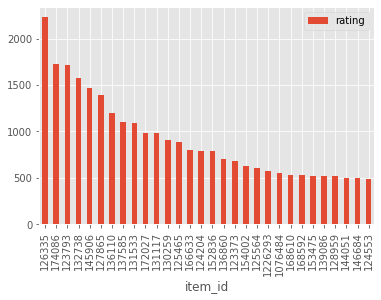

In [271]:
most_popular.head(30).plot(kind = "bar")

In [272]:
product_ratings1 = product_ratings.head(10000)

In [273]:
ratings_utility_matrix = product_ratings1.pivot_table(values='rating', index='user_id', columns='item_id', fill_value=0)
ratings_utility_matrix.head()

item_id,123373,123793,124204,124553,125424,125465,125564,126335,127081,127495,...,2953965,2954118,2954754,2955734,2957481,2958376,2960025,2960913,2960969,2963850
user_id,,,,,,,,,,,,,,,,,,,,,
321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
657,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As expected, the utility matrix obtaned above is sparce, I have filled up the unknown values wth 0.

In [274]:
ratings_utility_matrix.shape

(9124, 3104)

Recommended Product IDs: [1896920 1056174 2017483 2900163  169179]


C:\Users\manis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [276]:
product_descriptions1.columns

Index(['fit', 'user_id', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'review_text', 'body type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date'],
      dtype='object')

Transposing the matrix

In [277]:
X = ratings_utility_matrix.T
X.head()

user_id,321,483,611,657,772,1066,1070,1089,1141,1149,...,999016,999183,999231,999274,999371,999518,999621,999726,999828,999910
item_id,,,,,,,,,,,,,,,,,,,,,
123373,0,0,0,0,0,0,0,0,10,0,...,0,0,0,0,0,0,0,0,0,0
123793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124553,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [278]:
X.shape

(3104, 9124)

Unique products in subset of data

In [279]:
X1 = X

In [280]:
X

user_id,321,483,611,657,772,1066,1070,1089,1141,1149,...,999016,999183,999231,999274,999371,999518,999621,999726,999828,999910
item_id,,,,,,,,,,,,,,,,,,,,,
123373,0,0,0,0,0,0,0,0,10,0,...,0,0,0,0,0,0,0,0,0,0
123793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124553,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2960025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2960913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Recommendation System - Part III
* For a business without any user-item purchase history, a search engine based recommendation system can be designed for users. The product recommendations can be based on textual clustering analysis given in product description.
* **Dataset : **[Home Depot's dataset with product dataset.](https://www.kaggle.com/c/home-depot-product-search-relevance/data)

In [290]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

### Item to item based recommendation system based on product description

Applicable when business is setting up its E-commerce website for the first time

In [291]:
product_descriptions = pd.read_json('renttherunway_final_data.json', lines=True)
product_descriptions.shape

(192544, 15)

#### Checking for missing values

In [292]:
# Missing values

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
5,fit,734848,32b,364092,138lbs,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,"5' 8""",8,45.0,"April 30, 2016"


In [293]:
product_descriptions.shape

(146381, 15)

In [294]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["review_text"].head(10)

0     An adorable romper! Belt and zipper were a lit...
1     I rented this dress for a photo shoot. The the...
3     I rented this for my company's black tie award...
4     I have always been petite in my upper body and...
5     Didn't actually wear it. It fit perfectly. The...
6     This dress is so sweet. I loved the print. The...
7     Fit was great. Maybe a little tight under the ...
9     The dress was very flattering and fit perfectl...
10    The dress arrived with a small hole in the bea...
11    This dress was absolutely gorgeous and I recei...
Name: review_text, dtype: object

#### Feature extraction from product descriptions

Converting the text in product description into numerical data for analysis

In [295]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["review_text"])
X1

<500x2302 sparse matrix of type '<class 'numpy.float64'>'
	with 11700 stored elements in Compressed Sparse Row format>

In [296]:
X1.shape

(500, 2302)

#### Visualizing product clusters in subset of data

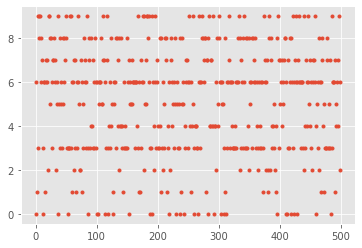

In [297]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
# diff init can be tried

# need to seet n_clusters 


y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()


F

In [298]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

## Output
* Recommendation of product based on the current product selected by user.
* To recommend related product based on, Frequently bought together. 

#### Top words in each cluster based on product description

In [299]:
# # Optimal clusters is need to find as of now based on occasions and dress types 10 seemed good 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 makes
 look
 dress
 size
 low
 pull
 absolutely
 fit
 way
 love
Cluster 1:
 dress
 size
 loved
 tight
 dinner
 wore
 got
 gorgeous
 beautiful
 ordered
Cluster 2:
 dress
 wear
 bra
 color
 love
 rent
 little
 fit
 fabric
 just
Cluster 3:
 dress
 day
 wore
 compliments
 like
 wear
 want
 bra
 perfect
 straps
Cluster 4:
 dress
 runs
 large
 wear
 little
 wore
 perfect
 size
 short
 small
Cluster 5:
 long
 fit
 perfectly
 dress
 little
 heels
 short
 wear
 way
 dresses
Cluster 6:
 size
 dress
 perfect
 fit
 true
 got
 compliments
 night
 definitely
 recommend
Cluster 7:
 comfortable
 slightly
 stretch
 flattering
 fit
 short
 dress
 recommend
 great
 room
Cluster 8:
 great
 dress
 super
 didn
 tight
 like
 wasn
 fit
 flattering
 little
Cluster 9:
 picture
 dress
 cleavage
 pin
 wore
 area
 bust
 big
 comfortable
 bridesmaid


#### Predicting clusters based on key search words

In [300]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

* **Keyword : ** cutting tool

In [301]:
import numpy as np

product_ids = product_descriptions1["item_id"].values

cluster_indices = {}

for i in range(len(product_ids)):
    cluster_label = y_kmeans[i]
    if cluster_label not in cluster_indices:
        cluster_indices[cluster_label] = []
    cluster_indices[cluster_label].append(i)

def show_recommendations(product):
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    cluster_label = prediction[0]
    print_cluster(cluster_label)

    recommended_indices = cluster_indices[cluster_label]
    recommended_product_ids = [product_ids[idx] for idx in recommended_indices]
    print("Recommended Product IDs:", recommended_product_ids)

show_recommendations("Party high cost")


Cluster 4:
 dress
 runs
 large
 wear
 little
 wore
 perfect
 size
 short
 small
Recommended Product IDs: [722678, 125564, 141761, 1318793, 2650125, 1526552, 757774, 1420896, 1754771, 168592, 1896920, 168610, 1108555, 136860, 1112658, 414009, 567599, 963476, 313821, 1875650, 330238, 532135, 295745, 183194, 1490515, 668280, 131533, 131533, 517998, 1516843, 466944, 123793, 1776178, 2122960, 865225, 2400816, 139792, 2577550, 182578, 755371, 2160087, 154002, 1337205, 2760153]


* **Keyword : **spray paint

In [302]:
show_recommendations("spray")

Cluster 2:
 dress
 wear
 bra
 color
 love
 rent
 little
 fit
 fabric
 just
Recommended Product IDs: [382883, 1854157, 1379493, 1896920, 714374, 127865, 125465, 152662, 2712258, 127865, 987052, 123793, 2429745, 145906, 1822358, 136110, 616682, 131533, 1220393, 703458, 1126889, 1714731]


* **Keyword : **steel drill

In [303]:
show_recommendations("sparkly white gown")

Cluster 3:
 dress
 day
 wore
 compliments
 like
 wear
 want
 bra
 perfect
 straps
Recommended Product IDs: [616682, 143094, 1064397, 2884139, 131533, 1472909, 259136, 2410627, 126335, 2529552, 1764436, 714374, 224876, 1146287, 883661, 417055, 1671465, 883661, 152836, 141300, 467817, 985087, 139086, 2533108, 1454376, 1057664, 391525, 182915, 131117, 2755484, 721424, 1520680, 862446, 1008562, 1982904, 783906, 795254, 1919019, 595048, 313568, 394079, 2958376, 1188641, 1046957, 1076484, 1595305, 1274956, 1967750, 134393, 195076, 1436642, 1433766, 1881176, 1416608, 2248191, 2273951, 2746761, 730008, 831463, 2417674, 515827, 1571446, 883661, 1080396, 1384766, 1977540, 124204, 141548, 285225, 1187659, 1250367, 1210233, 147594, 312893, 686884, 654025, 146684, 589412, 1505204, 172027, 851656, 1384766, 132135, 152836, 1142056]


In case a word appears in multiple clusters, the algorithm chooses the cluster with the highest frequency of occurance of the word.

* **Keyword : **water

In [304]:
show_recommendations("grey goth hoodie")

Cluster 2:
 dress
 wear
 bra
 color
 love
 rent
 little
 fit
 fabric
 just
Recommended Product IDs: [382883, 1854157, 1379493, 1896920, 714374, 127865, 125465, 152662, 2712258, 127865, 987052, 123793, 2429745, 145906, 1822358, 136110, 616682, 131533, 1220393, 703458, 1126889, 1714731]
